In [1]:
from scipy.sparse import lil_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# リストのリスト(List of LIsts : LIL)

In [2]:
# Create sparse matrix
a = lil_matrix((6, 6))

# Set the non-zero values
a[0,0]=1.; a[1,0]=2.; a[2, 3]=3.; a[2, 5]=4.; a[4, 4]=5.; a[5, 5]=6.

print("(row, column) value")
print(a, '\n')
print("Normal type: ")
print(a.todense()) # 普通の行列の形に戻す
print("LIL type: ")
print(a.rows) # 各行で何列目に非ゼロ要素が入っているか
print(a.data) # 各行での非ゼロ要素

(row, column) value
  (0, 0)	1.0
  (1, 0)	2.0
  (2, 3)	3.0
  (2, 5)	4.0
  (4, 4)	5.0
  (5, 5)	6.0 

Normal type: 
[[1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 4.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 6.]]
LIL type: 
[list([0]) list([0]) list([3, 5]) list([]) list([4]) list([5])]
[list([1.0]) list([2.0]) list([3.0, 4.0]) list([]) list([5.0]) list([6.0])]


# 圧縮行格納方式(Compressed Sparse Row : CSR)

In [3]:
a_csr = a.tocsr()
print("Noraml type: ")
print(a_csr.todense())
print("csr type:")
print(a_csr.indices, "# indices: 上の行から順に要素が何列目にあるかを表示している。")
print(a_csr.data, "# data: indicesに合わせて、その非ゼロの要素を示す。")
print(a_csr.indptr, "# indptr: 各行で要素が何個あるかを数えて、それを積算する。0から始まるため、行数+1のサイズになる。")

Noraml type: 
[[1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 4.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 6.]]
csr type:
[0 0 3 5 4 5] # indices: 上の行から順に要素が何列目にあるかを表示している。
[1. 2. 3. 4. 5. 6.] # data: indicesに合わせて、その非ゼロの要素を示す。
[0 1 2 4 4 5 6] # indptr: 各行で要素が何個あるかを数えて、それを積算する。0から始まるため、行数+1のサイズになる。


# 圧縮列格納方式(Compressed Sparse Column : CSC)

In [4]:
a_csc = a.tocsc()
print("Normal type: ")
print(a_csc.todense())
print("csc type:")
print(a_csc.indices, "# indices: 左の列から順に要素が何行目にあるかを表示している。")
print(a_csc.data, "# data: indicesに合わせて、その非ゼロの要素を示す。")
print(a_csc.indptr, "# indptr: 各列で要素が何個あるかを数えて、それを積算する。0から始まるため、列数+1のサイズになる。")

Normal type: 
[[1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 4.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 6.]]
csc type:
[0 1 2 4 2 5] # indices: 左の列から順に要素が何行目にあるかを表示している。
[1. 2. 3. 5. 4. 6.] # data: indicesに合わせて、その非ゼロの要素を示す。
[0 2 2 2 3 4 6] # indptr: 各列で要素が何個あるかを数えて、それを積算する。0から始まるため、列数+1のサイズになる。


# 結果の比較

403 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
31.6 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


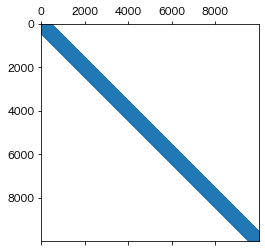

In [14]:
import scipy.sparse
import numpy as np
import matplotlib.pyplot as plt
num = 10**4
# Creat LIL type sparse matrix
a_large = scipy.sparse.lil_matrix((num,num))
# Set the non-zero values
a_large.setdiag(np.ones(num)*2)
a_large.setdiag(np.ones(num-1)*-1, k=1)
a_large.setdiag(np.ones(num-1)*-1, k=-1)
a_large_csr = a_large.tocsr()
a_large_dense = a_large.todense()
plt.spy(a_large_csr)
b = np.ones(num)
%timeit a_large_csr.dot(b)  # CSR方式
%timeit a_large_dense.dot(b)  # 普通の行列

# 直接法ライブラリ

Δx: 1.0 Δt: 0.2 d: 0.1


(100.0, 200.0)

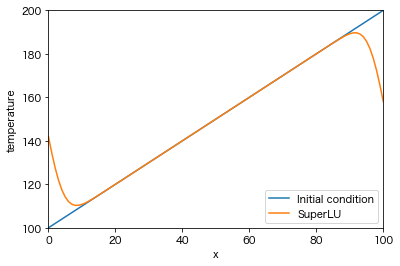

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla
# Make stencils
# Creat square wave
Num_stencil_x = 101
x_array = np.float64(np.arange(Num_stencil_x))
temperature_array = x_array + 100
temperature_lower_boundary = 150
temperature_upper_boundary = 150
Time_step = 100
Delta_x = max(x_array) / (Num_stencil_x-1)
C = 1
Delta_t = 0.2
kappa = 0.5
d = kappa * Delta_t / Delta_x**2
total_movement = C * Delta_t * (Time_step+1)
exact_temperature_array = (temperature_upper_boundary - temperature_lower_boundary) / (x_array[-1] - x_array[0]) * x_array + temperature_lower_boundary
plt.plot(x_array, temperature_array, label="Initial condition")
print("Δx:", Delta_x, "Δt:", Delta_t, "d:", d)

temperature_sp = temperature_array.copy()
for n in range(Time_step):
    a_matrix = np.identity(len(temperature_sp)) * 2 *(1/d+1) \
                - np.eye(len(temperature_sp), k=1) \
                - np.eye(len(temperature_sp), k=-1)
    temp_temperature_array = np.append(np.append(
                        temperature_lower_boundary, 
                        temperature_sp), temperature_upper_boundary)
    b_array = 2 * (1/d - 1) * temperature_sp + temp_temperature_array[2:] + temp_temperature_array[:-2]
    b_array[0] += temperature_lower_boundary
    b_array[-1] += temperature_upper_boundary
    a_csr = scipy.sparse.csr_matrix(a_matrix)
    temperature_sp = spla.dsolve.spsolve(a_csr, b_array)
plt.plot(x_array, temperature_sp, label="SuperLU")
plt.legend(loc="lower right")
plt.xlabel("x")
plt.ylabel("temperature")
plt.xlim(0, max(x_array))
plt.ylim(100, 200)

# 反復法ライブラリ

(100.0, 200.0)

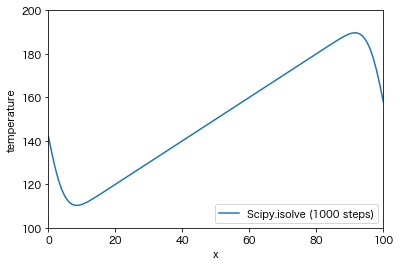

In [18]:
temperature_sp = temperature_array.copy()
for n in range(Time_step):
    a_matrix = np.identity(len(temperature_sp)) * 2 *(1/d+1) \
                - np.eye(len(temperature_sp), k=1) \
                - np.eye(len(temperature_sp), k=-1)
    temp_temperature_array = np.append(np.append(
                        temperature_lower_boundary, 
                        temperature_sp), temperature_upper_boundary)
    b_array = 2.0 * (1/d - 1.0) * temperature_sp + temp_temperature_array[2:] + temp_temperature_array[:-2]
    b_array[0] += temperature_lower_boundary
    b_array[-1] += temperature_upper_boundary
    a_csr = scipy.sparse.csr_matrix(a_matrix)
    temperature_sp = spla.isolve.bicgstab(a_csr, b_array)[0]
plt.plot(x_array, temperature_sp, label="Scipy.isolve (1000 steps)")

plt.legend(loc="lower right")
plt.xlabel("x")
plt.ylabel("temperature")
plt.xlim(0, max(x_array))
plt.ylim(100, 200)